In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [24]:
train_dir = 'C:/Users/SHIVA/OneDrive/Desktop/archive (1)/train'
val_dir = 'C:/Users/SHIVA/OneDrive/Desktop/archive (1)/test'

In [28]:
num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 80
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [29]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [30]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=num_train // batch_size,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=num_val // batch_size)


Epoch 1/80
448/448 [==============================] - 123s 274ms/step - loss: 1.7878 - accuracy: 0.2683 - val_loss: 1.6601 - val_accuracy: 0.3633
Epoch 2/80
448/448 [==============================] - 119s 265ms/step - loss: 1.6074 - accuracy: 0.3787 - val_loss: 1.5257 - val_accuracy: 0.4251
Epoch 3/80
448/448 [==============================] - 122s 272ms/step - loss: 1.5100 - accuracy: 0.4190 - val_loss: 1.4436 - val_accuracy: 0.4498
Epoch 4/80
448/448 [==============================] - 122s 272ms/step - loss: 1.4462 - accuracy: 0.4468 - val_loss: 1.3937 - val_accuracy: 0.4789
Epoch 5/80
448/448 [==============================] - 121s 271ms/step - loss: 1.3854 - accuracy: 0.4722 - val_loss: 1.3508 - val_accuracy: 0.4909
Epoch 6/80
448/448 [==============================] - 121s 271ms/step - loss: 1.3398 - accuracy: 0.4903 - val_loss: 1.3070 - val_accuracy: 0.5033
Epoch 7/80
448/448 [==============================] - 121s 270ms/step - loss: 1.2969 - accuracy: 0.5073 - val_loss: 1.2708 -

Epoch 57/80
448/448 [==============================] - 138s 308ms/step - loss: 0.3024 - accuracy: 0.8925 - val_loss: 1.3038 - val_accuracy: 0.6186
Epoch 58/80
448/448 [==============================] - 144s 320ms/step - loss: 0.2931 - accuracy: 0.8944 - val_loss: 1.3035 - val_accuracy: 0.6200
Epoch 59/80
448/448 [==============================] - 133s 298ms/step - loss: 0.2935 - accuracy: 0.8952 - val_loss: 1.3096 - val_accuracy: 0.6222
Epoch 60/80
448/448 [==============================] - 126s 280ms/step - loss: 0.2733 - accuracy: 0.9033 - val_loss: 1.3264 - val_accuracy: 0.6221
Epoch 61/80
448/448 [==============================] - 126s 282ms/step - loss: 0.2826 - accuracy: 0.8974 - val_loss: 1.3185 - val_accuracy: 0.6295
Epoch 62/80
448/448 [==============================] - 125s 279ms/step - loss: 0.2644 - accuracy: 0.9049 - val_loss: 1.3389 - val_accuracy: 0.6258
Epoch 63/80
448/448 [==============================] - 125s 279ms/step - loss: 0.2597 - accuracy: 0.9080 - val_loss: 1

In [31]:
acc=history.history['accuracy']
print(acc[-1])

0.9324140548706055


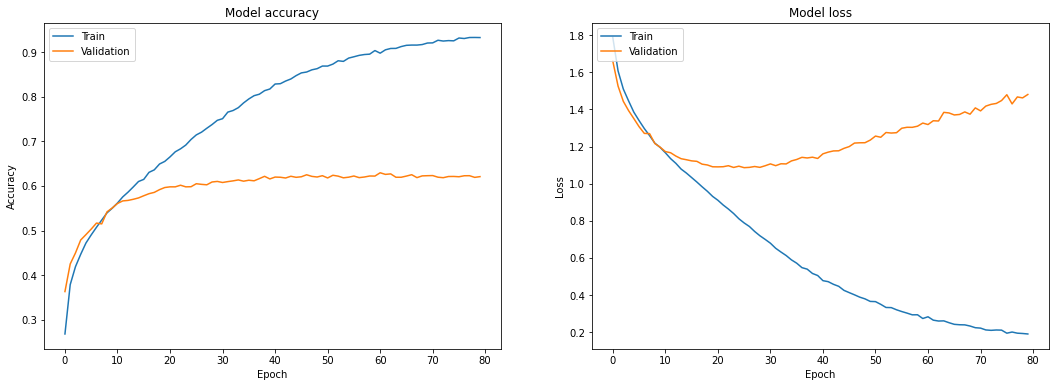

In [32]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
model.save('image_emotion.h5')

In [34]:
my_model=tf.keras.models.load_model('image_emotion.h5')

(48, 48)


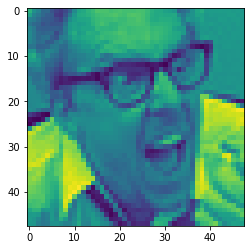

In [35]:
img = image.load_img("C:/Users/SHIVA/OneDrive/Desktop/archive (1)/train/angry/Training_3908.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [36]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = my_model.predict(img)
print(result)
result = list(result[0])
print(result)

[[1. 0. 0. 0. 0. 0. 0.]]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [37]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
img_index = result.index(max(result))#input image
print(label_dict[img_index])
plt.show()

Angry
